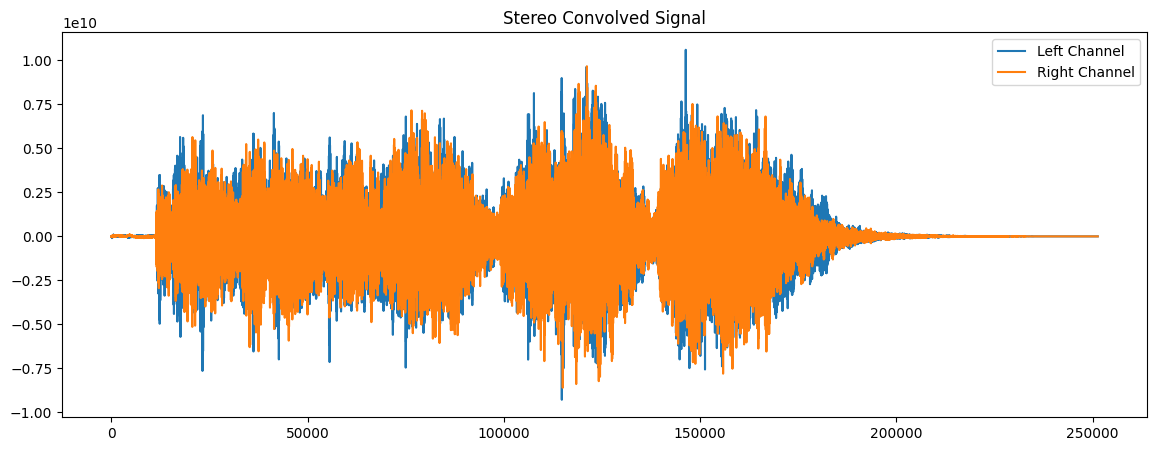

In [37]:
import numpy as np
import scipy.io.wavfile as wav
from IPython.display import Audio, display
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

# Loading the input audio file
fs_inp, inp = wav.read("BheegiRegular.wav")

# Load the RIR file
fs_rir, rir = wav.read("long_echo_hall_16k.wav")

# Function to perform convolution using FFT
def convolve_fft(signal, rir_channel):
    # Use fftconvolve for efficient convolution
    return fftconvolve(signal, rir_channel, mode='full')

# Playing the original mono audio
print("Original Audio")
display(Audio(inp, rate=fs_inp))

# Obtaining RIR for left and right channels
rir_left = rir[:, 0]
rir_right = rir[:, 1]

# Performing convolution for each channel using fftconvolve
out_left = convolve_fft(inp, rir_left)
out_right = convolve_fft(inp, rir_right)

# Combining the convolved signals into a stereo output
out = np.vstack((out_left, out_right)).T

# Normalizing to avoid clipping
out = out / np.max(np.abs(out))

# Saving the convolved stereo signal to a new WAV file
wav.write("output_stereo_reverb.wav", fs_inp, (out * 32767).astype(np.int16))

# Playing the stereo convolved audio
display(Audio(out.T, rate=fs_inp))

# Plotting the waveforms
plt.figure(figsize=(14, 5))
plt.plot(out_left, label="Left Channel")
plt.plot(out_right, label="Right Channel")
plt.title("Stereo Convolved Signal")
plt.legend()
plt.show()
